In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Algorithm

In [2]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        # find unique classes in the labels
        self.classes = np.unique(y)
        self.parameters = []
        # for each class, compute the mean and standard deviation of the features for the samples belonging to that class
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            # convert to numpy array
            X_c = np.array(X_c, dtype=np.float64)
            mean = X_c.mean(axis=0)
            std = X_c.std(axis=0)
            self.parameters.append((mean, std))
        
    def print_parameters(self):
        for i, c in enumerate(self.classes):
            print('Class {}: mean = {}, std = {}'.format(c, self.parameters[i][0], self.parameters[i][1]))

    def _prob(self, x, mean, std):
        # compute Gaussian probability density function
        exponent = np.exp(-((x-mean)**2 / (2 * std**2)))
        return np.log(exponent / (np.sqrt(2 * np.pi) * std))

    def predict(self, X):
        n_samples = X.shape[0]
        test_thresh = []
        X = X.T
        y_pred = [None for _ in range(n_samples)]
        # for each sample in X, compute the posterior probability of each class
        for i in range(n_samples):
            sample = np.array(X[i], dtype=np.float64)
            posteriors = []
            for mean, std in self.parameters:
                # assume equal prior probability for all classes
                prior = np.log(1/len(self.classes))
                # compute the sum of log probabilities for each feature
                posterior = np.sum(self._prob(sample, mean, std)) + prior
                posteriors.append(posterior)
            # choose the class with the highest posterior probability
            y_pred[i] = self.classes[np.argmax(posteriors)]
        return y_pred


# Dataset Manipulation

In [3]:
data = pd.read_csv('iris.tmls')
data = data.drop(data.index[0])
data.head()

,sepal length,sepal width,petal length,petal width,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# creating 3 datasets. removing 1 class from the main dataset each time
classes = data['class'].unique()
datasets = []

for i in range(len(classes)):
    # reset index
    temp = data[data['class'] != classes[i]]
    temp = temp.reset_index(drop=True)
    datasets.append(temp)


# Dataset 0
## Iris-versicolor and Iris-virginica

In [5]:
dataset_0 = datasets[0]

In [6]:
# randomly split the dataset into 10 folds
dataset_0_split = np.array_split(dataset_0, 10)

In [7]:
set_0_accuracies = []

for i in range(10):
    # each iteration uses a different tenth of the original dataset as the test set
    test = dataset_0_split[i]
    test = pd.DataFrame(test)
    # the remaining 9/10ths of the dataset are used as the training set
    train = pd.DataFrame()
    for j in range(10):
        if j != i:
            temp = pd.DataFrame(dataset_0_split[j])
            train = pd.concat([train, temp], ignore_index=True)
        
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)

    # split the training and test sets into features and labels
    X_train = train.iloc[:, :-1]
    y_train = train.iloc[:, -1]
    # train the model
    model = GaussianNaiveBayes()
    model.fit(X_train, y_train)
    
    # test the model
    X_test = test.iloc[:, :-1]
    y_test = test.iloc[:, -1]
    y_pred = model.predict(X_test)

    # compute accuracy
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    set_0_accuracies.append(accuracy)

# Dataset 1
## Iris-setosa and Iris-virginica

In [8]:
dataset_1 = datasets[1]

In [9]:
dataset_1_split = np.array_split(dataset_1, 10)

In [10]:
set_1_accuracies = []

for i in range(10):
    # each iteration uses a different tenth of the original dataset as the test set
    test = np.array(dataset_1_split[i])
    test = pd.DataFrame(test)
    # the remaining 9/10ths of the dataset are used as the training set
    train = pd.DataFrame()
    for j in range(10):
        if j != i:
            temp = np.array(dataset_1_split[j])
            temp = pd.DataFrame(temp)
            train = pd.concat([train, temp], ignore_index=True)

        
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)

    # split the training and test sets into features and labels
    X_train = train.iloc[:, :-1]
    y_train = train.iloc[:, -1]
    # train the model
    model = GaussianNaiveBayes()
    model.fit(X_train, y_train)

    
    # test the model
    X_test = test.iloc[:, :-1]
    y_test = test.iloc[:, -1]
    y_pred = model.predict(X_test)

    # compute accuracy
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    set_1_accuracies.append(accuracy)

# Dataset 2
## Iris-setosa and Iris-versicolor

In [11]:
dataset_2 = datasets[2]

In [12]:
dataset_2_split = np.array_split(dataset_2, 10)

In [13]:
set_2_accuracies = []

for i in range(10):
    # each iteration uses a different tenth of the original dataset as the test set
    test = np.array(dataset_2_split[i])
    test = pd.DataFrame(test)
    # the remaining 9/10ths of the dataset are used as the training set
    train = pd.DataFrame()
    for j in range(10):
        if j != i:
            temp = np.array(dataset_2_split[j])
            temp = pd.DataFrame(temp)
            train = pd.concat([train, temp], ignore_index=True)

        
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)

    # split the training and test sets into features and labels
    X_train = train.iloc[:, :-1]
    y_train = train.iloc[:, -1]
    # train the model
    model = GaussianNaiveBayes()
    model.fit(X_train, y_train)

    
    # test the model
    X_test = test.iloc[:, :-1]
    y_test = test.iloc[:, -1]
    y_pred = model.predict(X_test)

    # compute accuracy
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    set_2_accuracies.append(accuracy)

In [14]:
print(set_0_accuracies, set_1_accuracies, set_2_accuracies)

[0.9, 1.0, 0.8, 1.0, 1.0, 0.9, 0.9, 1.0, 0.8, 1.0] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


# ROC Plot

In [15]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        # find unique classes in the labels
        self.classes = np.unique(y)
        self.parameters = []
        # for each class, compute the mean and standard deviation of the features for the samples belonging to that class
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            # convert to numpy array
            X_c = np.array(X_c, dtype=np.float64)
            mean = X_c.mean(axis=0)
            std = X_c.std(axis=0)
            self.parameters.append((mean, std))
        
    def print_parameters(self):
        for i, c in enumerate(self.classes):
            print('Class {}: mean = {}, std = {}'.format(c, self.parameters[i][0], self.parameters[i][1]))

    def _prob(self, x, mean, std):
        # compute Gaussian probability density function
        exponent = np.exp(-((x-mean)**2 / (2 * std**2)))
        return np.log(exponent / (np.sqrt(2 * np.pi) * std))

    def predict(self, X):
        n_samples = X.shape[0]
        X = X.T
        y_pred = [None for _ in range(n_samples)]
        # for each sample in X, compute the posterior probability of each class
        for i in range(n_samples):
            sample = np.array(X[i], dtype=np.float64)
            posteriors = []
            for mean, std in self.parameters:
                # assume equal prior probability for all classes
                prior = np.log(1/len(self.classes))
                # compute the sum of log probabilities for each feature
                posterior = np.sum(self._prob(sample, mean, std)) + prior
                posteriors.append(posterior)
            # choose the class with the highest posterior probability
            y_pred[i] = self.classes[np.argmax(posteriors)]
        return y_pred

    def get_thresh(self, X):
        n_samples = X.shape[0]
        X = X.T
        thresh = []
        # for each sample in X, compute the posterior probability of each class
        for i in range(n_samples):
            sample = np.array(X[i], dtype=np.float64)
            posteriors = []
            for mean, std in self.parameters:
                # assume equal prior probability for all classes
                prior = np.log(1/len(self.classes))
                # compute the sum of log probabilities for each feature
                posterior = np.sum(self._prob(sample, mean, std)) + prior
                posteriors.append(posterior)
            to_append = [np.max(posteriors) - np.min(posteriors)]
            thresh.append(to_append)
        return thresh

    def thresh_predict(self, X, thresh):
        n_samples = X.shape[0]
        X = X.T
        y_pred = [None for _ in range(n_samples)]
        # for each sample in X, compute the posterior probability of each class
        for i in range(n_samples):
            sample = np.array(X[i], dtype=np.float64)
            posteriors = []
            for mean, std in self.parameters:
                # assume equal prior probability for all classes
                prior = np.log(1/len(self.classes))
                # compute the sum of log probabilities for each feature
                posterior = np.sum(self._prob(sample, mean, std)) + prior
                posteriors.append(posterior)
            # choose the class with the highest posterior probability
            if np.max(posteriors) - np.min(posteriors) > thresh:
                y_pred[i] = self.classes[1]
            else:
                y_pred[i] = self.classes[0]
        return y_pred

In [16]:
model = GaussianNaiveBayes()
dataset = datasets[0]
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
model.fit(X, y)
probs = model.get_thresh(X)
range_min = int(np.floor(np.min(probs)))
range_max = int(np.ceil(np.max(probs)))

data = []
for i in range(range_min, range_max):
    y_pred = model.thresh_predict(X, i)
    accuracy = np.sum(y_pred == y) / len(y)
    # calculate true positive rate and false positive rate
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for j in range(len(y_pred)):
        if y_pred[j] == y[j]:
            if y_pred[j] == model.classes[1]:
                tp += 1
            else:
                tn += 1
        else:
            if y_pred[j] == model.classes[1]:
                fp += 1
            else:
                fn += 1
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    to_append = [i, accuracy, tpr, fpr]
    data.append(to_append)


In [23]:
dataset_0 = datasets[0]
dataset_0_split = np.array_split(dataset_0, 10)

data = []
for i in range(10):
    # each iteration uses a different tenth of the original dataset as the test set
    test = dataset_0_split[i]
    test = pd.DataFrame(test)
    # the remaining 9/10ths of the dataset are used as the training set
    train = pd.DataFrame()
    for j in range(10):
        if j != i:
            temp = pd.DataFrame(dataset_0_split[j])
            train = pd.concat([train, temp], ignore_index=True)
        
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)

    # split the training and test sets into features and labels
    X_train = train.iloc[:, :-1]
    y_train = train.iloc[:, -1]
    # train the model
    model = GaussianNaiveBayes()
    model.fit(X_train, y_train)

    # get thresholds
    probs = model.get_thresh(X_train)
    range_min = int(np.floor(np.min(probs)))
    range_max = int(np.ceil(np.max(probs)))

    for j in range(range_min, range_max):
        y_pred = model.thresh_predict(X_train, j)
        accuracy = np.sum(y_pred == y_train) / len(y_train)
        # calculate true positive rate and false positive rate
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        for k in range(len(y_pred)):
            if y_pred[k] == y_train[k]:
                if y_pred[k] == model.classes[1]:
                    tp += 1
                else:
                    tn += 1
            else:
                if y_pred[k] == model.classes[1]:
                    fp += 1
                else:
                    fn += 1
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        to_append = [j, accuracy, tpr, fpr]
        data.append(to_append)

In [24]:
data

[[0, 0.5555555555555556, 1.0, 1.0],
 [1, 0.5555555555555556, 0.96, 0.95],
 [2, 0.5555555555555556, 0.9, 0.875],
 [3, 0.5444444444444444, 0.86, 0.85],
 [4, 0.5222222222222223, 0.76, 0.775],
 [5, 0.5555555555555556, 0.72, 0.65],
 [6, 0.5777777777777777, 0.72, 0.6],
 [7, 0.5666666666666667, 0.64, 0.525],
 [8, 0.5777777777777777, 0.64, 0.5],
 [9, 0.6, 0.56, 0.35],
 [10, 0.6111111111111112, 0.56, 0.325],
 [11, 0.6555555555555556, 0.56, 0.225],
 [12, 0.6555555555555556, 0.54, 0.2],
 [13, 0.6666666666666666, 0.5, 0.125],
 [14, 0.6444444444444445, 0.44, 0.1],
 [15, 0.6222222222222222, 0.38, 0.075],
 [16, 0.6, 0.28, 0.0],
 [17, 0.5888888888888889, 0.26, 0.0],
 [18, 0.5888888888888889, 0.26, 0.0],
 [19, 0.5666666666666667, 0.22, 0.0],
 [20, 0.5444444444444444, 0.18, 0.0],
 [21, 0.5444444444444444, 0.18, 0.0],
 [22, 0.5444444444444444, 0.18, 0.0],
 [23, 0.5333333333333333, 0.16, 0.0],
 [24, 0.5111111111111111, 0.12, 0.0],
 [25, 0.5, 0.1, 0.0],
 [26, 0.4777777777777778, 0.06, 0.0],
 [27, 0.4777777

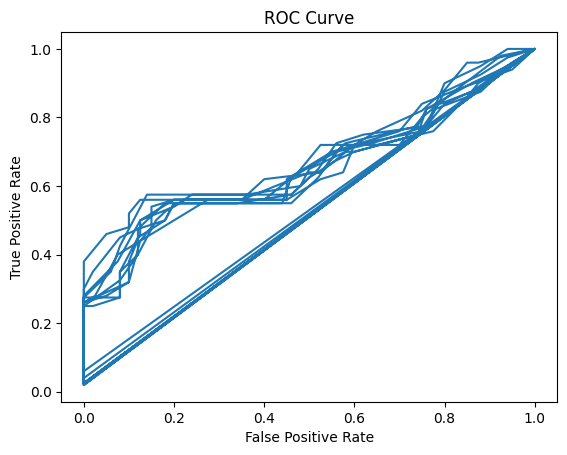

In [18]:
# plot tpr vs fpr
plt.plot([row[3] for row in data], [row[2] for row in data])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# The above is done after 10 fold cross validation, so there are 10 ROC curves for each dataset

In [19]:
model_0 = GaussianNaiveBayes()
dataset_0 = datasets[0]
X_0 = dataset_0.iloc[:, :-1]
y_0 = dataset_0.iloc[:, -1]
model_0.fit(X_0, y_0)
thresh = model.get_thresh(X)
range_min = int(np.floor(np.min(thresh)))
range_max = int(np.ceil(np.max(thresh)))

data_0 = []
for i in range(range_min, range_max):
    y_pred = model.thresh_predict(X_0, i)
    accuracy = np.sum(y_pred == y_0) / len(y_0)
    # calculate true positive rate and false positive rate
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for j in range(len(y_pred)):
        if y_pred[j] == y_0[j]:
            if y_pred[j] == model_0.classes[1]:
                tp += 1
            else:
                tn += 1
        else:
            if y_pred[j] == model_0.classes[1]:
                fp += 1
            else:
                fn += 1
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    to_append = [i, accuracy, tpr, fpr]
    data_0.append(to_append)

model_1 = GaussianNaiveBayes()
dataset_1 = datasets[1]
X_1 = dataset_1.iloc[:, :-1]
y_1 = dataset_1.iloc[:, -1]
model_1.fit(X_1, y_1)
thresh = model.get_thresh(X)
range_min = int(np.floor(np.min(thresh)))
range_max = int(np.ceil(np.max(thresh)))

data_1 = []
for i in range(range_min, range_max):
    y_pred = model.thresh_predict(X_1, i)
    accuracy = np.sum(y_pred == y_1) / len(y_1)
    # calculate true positive rate and false positive rate
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for j in range(len(y_pred)):
        if y_pred[j] == y_1[j]:
            if y_pred[j] == model_1.classes[1]:
                tp += 1
            else:
                tn += 1
        else:
            if y_pred[j] == model_1.classes[1]:
                fp += 1
            else:
                fn += 1
    tpr = tp / (tp + fn)
    try:
        fpr = fp / (fp + tn)
    except ZeroDivisionError:
        fpr = 0
    to_append = [i, accuracy, tpr, fpr]
    data_1.append(to_append)

model_2 = GaussianNaiveBayes()
dataset_2 = datasets[2]
X_2 = dataset_2.iloc[:, :-1]
y_2 = dataset_2.iloc[:, -1]
model_2.fit(X_2, y_2)
thresh = model.get_thresh(X)
range_min = int(np.floor(np.min(thresh)))
range_max = int(np.ceil(np.max(thresh)))

data_2 = []
for i in range(range_min, range_max):
    y_pred = model.thresh_predict(X_2, i)
    accuracy = np.sum(y_pred == y_2) / len(y_2)
    # calculate true positive rate and false positive rate
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for j in range(len(y_pred)):
        if y_pred[j] == y_2[j]:
            if y_pred[j] == model_2.classes[1]:
                tp += 1
            else:
                tn += 1
        else:
            if y_pred[j] == model_2.classes[1]:
                fp += 1
            else:
                fn += 1
    tpr = tp / (tp + fn)
    try:
        fpr = fp / (fp + tn)
    except ZeroDivisionError:
        fpr = 0
    to_append = [i, accuracy, tpr, fpr]
    data_2.append(to_append)

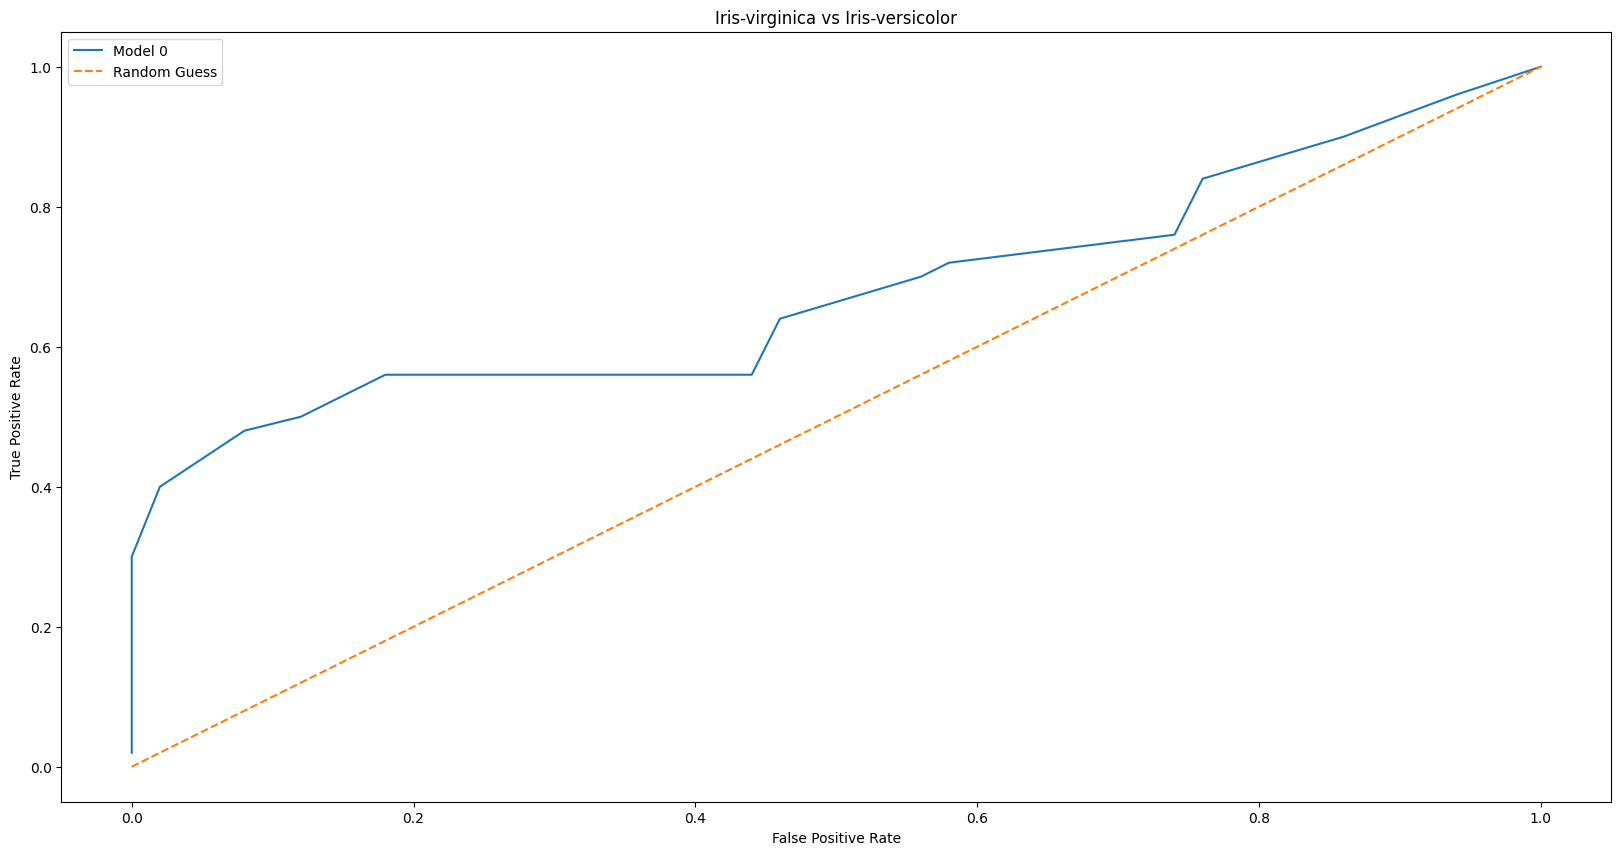

In [20]:
# plot model 0
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot([row[3] for row in data_0], [row[2] for row in data_0], label='Model 0')
# plot y = x as a dotted line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title(f"{model_0.classes[1]} vs {model_0.classes[0]}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

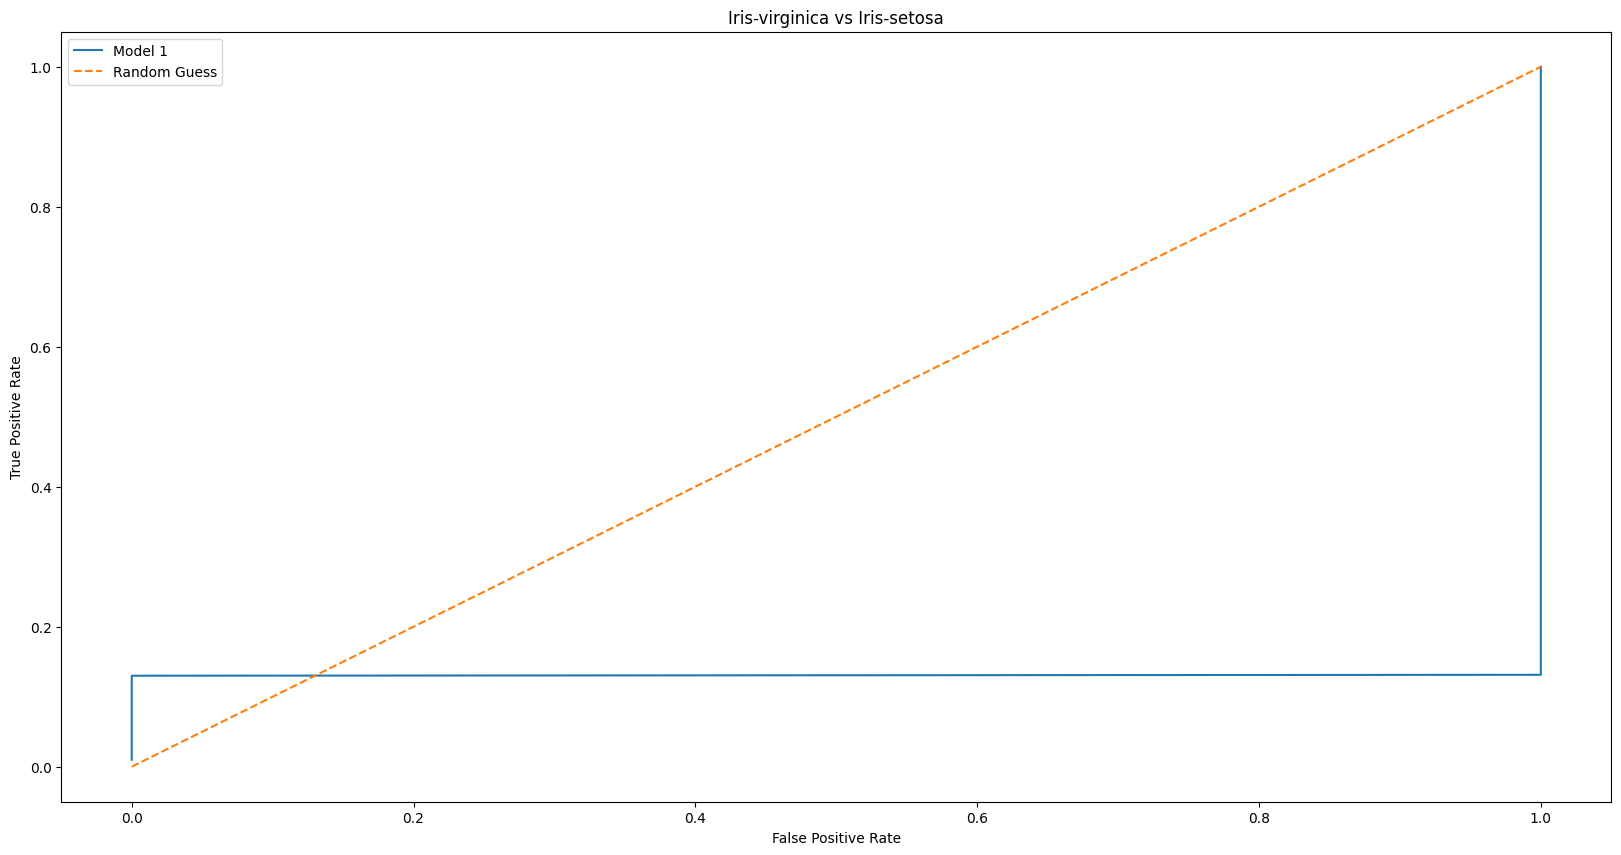

In [21]:
# plot model 1
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot([row[3] for row in data_1], [row[2] for row in data_1], label='Model 1')
# plot y = x as a dotted line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title(f"{model_1.classes[1]} vs {model_1.classes[0]}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

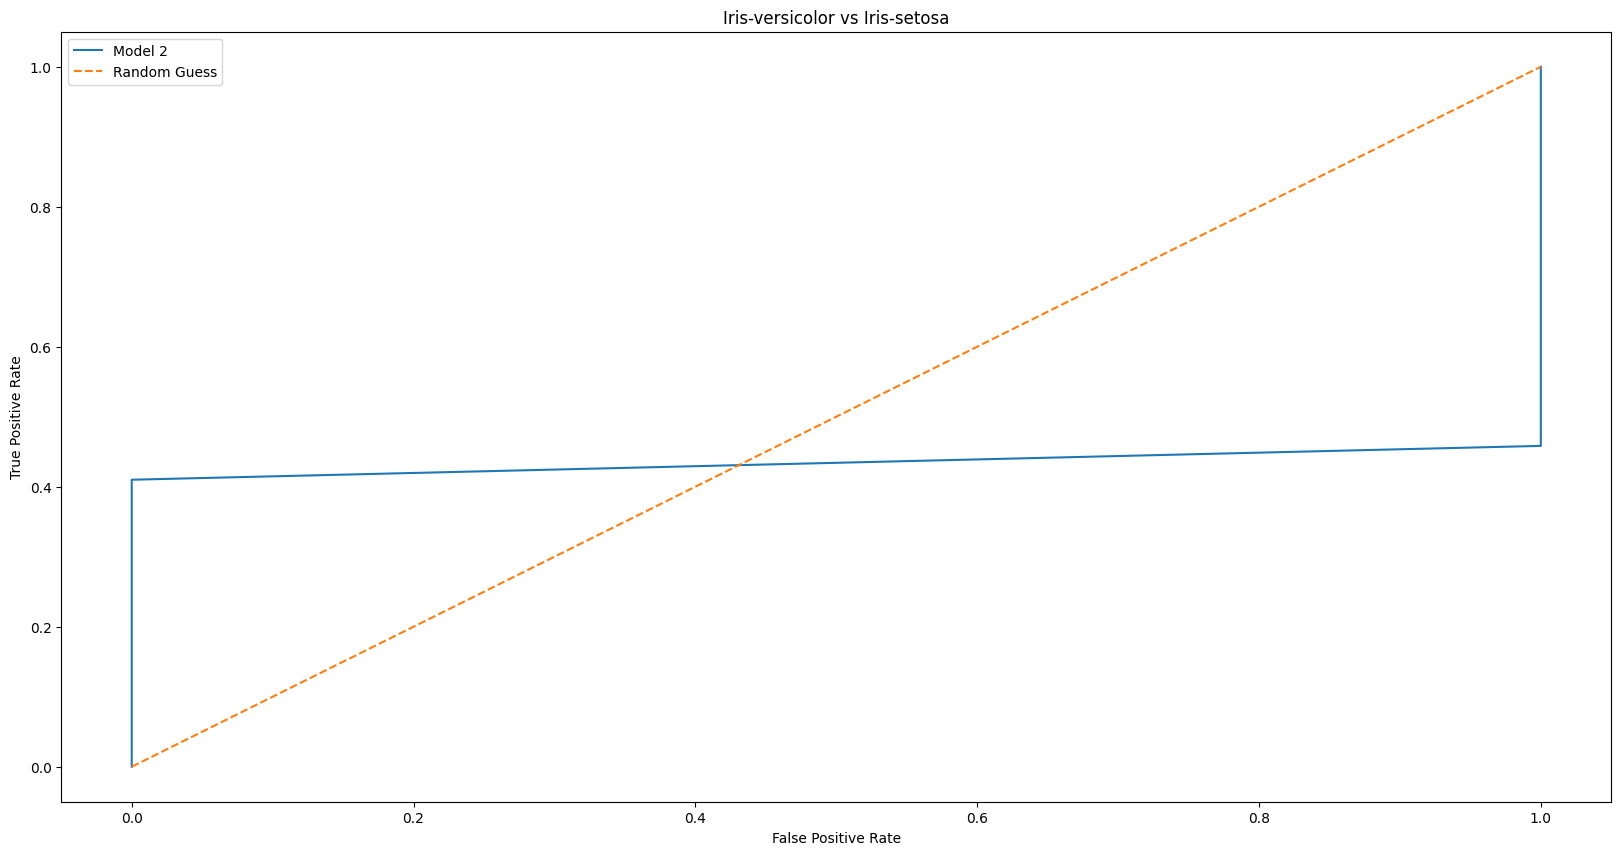

In [22]:
# plot model 2
plt.rcParams["figure.figsize"] = (20, 10)
plt.plot([row[3] for row in data_2], [row[2] for row in data_2], label='Model 2')
# plot y = x as a dotted line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title(f"{model_2.classes[1]} vs {model_2.classes[0]}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()